# Régression linéaire à une variable - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

### Charger les données du fichier ex1data1.csv

In [100]:
import numpy as np
import pandas as pd
%matplotlib inline

In [101]:
data = pd.read_csv("../assets/datasets/ex1data1.csv")
data#affichage des data fraichement importees

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


### Visualiser les données

<AxesSubplot:xlabel='population', ylabel='profit'>

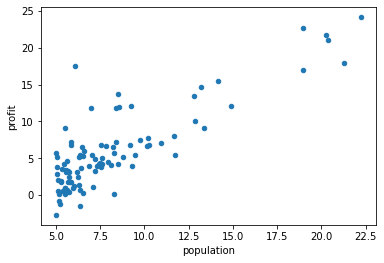

In [102]:
data.plot.scatter('population', 'profit')

### Découpez vos données en deux vecteurs X et y et transformerz-les en array numpy

Note: Les colonnes d'un Dataframe peuvent être sélectionnées par leur nom, de la même manière que dans un dictionnaire

In [103]:
X = np.array(data['population'])
y = np.array(data['profit'])
(X,y)#X et y sont bien 2 array, l'un contenant la premiere colonne, l'autre la deuxieme

(array([6.11, 5.53, 8.52, 7.00, 5.86, 8.38, 7.48, 8.58, 6.49, 5.05, 5.71,
        14.16, 5.73, 8.41, 5.64, 5.38, 6.37, 5.13, 6.43, 7.07, 6.19, 20.27,
        5.49, 6.33, 5.56, 18.95, 12.83, 10.96, 13.18, 22.20, 5.25, 6.59,
        9.25, 5.89, 8.21, 7.93, 8.10, 5.61, 12.84, 6.35, 5.41, 6.88, 11.71,
        5.77, 7.82, 7.09, 5.07, 5.80, 11.70, 5.54, 7.54, 5.31, 7.42, 7.60,
        6.33, 6.36, 6.27, 5.64, 9.31, 9.45, 8.83, 5.18, 21.28, 14.91,
        18.96, 7.22, 8.30, 10.24, 5.50, 20.34, 10.14, 7.33, 6.01, 7.23,
        5.03, 6.55, 7.54, 5.04, 10.27, 5.11, 5.73, 5.19, 6.36, 9.77, 6.52,
        8.52, 9.18, 6.00, 5.52, 5.06, 5.71, 7.64, 5.87, 5.31, 8.29, 13.39,
        5.44]),
 array([17.59, 9.13, 13.66, 11.85, 6.82, 11.89, 4.35, 12.00, 6.60, 3.82,
        3.25, 15.51, 3.16, 7.23, 0.72, 3.51, 5.30, 0.56, 3.65, 5.39, 3.14,
        21.77, 4.26, 5.19, 3.08, 22.64, 13.50, 7.05, 14.69, 24.15, -1.22,
        6.00, 12.13, 1.85, 6.54, 4.56, 4.12, 3.39, 10.12, 5.50, 0.56, 3.91,
        5.39, 2.44, 

## Calcul d'une première prédiction

### Initialisez theta en un vecteur de deux valeurs à zéro

In [104]:
theta = np.zeros(2)
theta# affichage du contenu de theta

array([0.00, 0.00])

### Écrivez une fonction _predict_ qui prend en argument un vecteur de population (x) ainsi que les parametres theta et prédit un vecteur de profits (y) associé

In [105]:
def predict(X, theta):# On fait un prediction basee sur les parametres theta et la valeur d'input X
    return (X * theta[1] + theta[0])# C'est exactement une fonction affine f(x) = ax + b

### Écrivez une fonction _fit_ qui prend en arguments le vecteur X et le vecteur y des données d'entraînement et renvoie le vecteur de paramètres _theta_ qui a été appris

In [106]:
def fit(X, y, theta, alpha, num_iters):
    # Initialiser certaines variable utiles
    m = X.shape[0]
    
    # Boucler sur le nombre d'itérations
    for itr in range(num_iters):
        loss = predict(X, theta) - y #egale a la distance entre la prediction (un y artificiel si vous voulez) et le y provenant du dataset 
        tmp_theta0 = theta[0] - (alpha / m) * sum(loss)
        tmp_theta1 = theta[1] - (alpha / m) * sum(loss * X.T)
        theta = [tmp_theta0, tmp_theta1]
        # On update theta une fois par tour de boucle
        
    return (theta)

### Lancez l'apprentissage en appelant la fonction _fit_ et en prenant bien soin de récupérer le résultat de *theta* à la fin!! Vous devriez obtenir des valeurs autour de [-3.6303, 1.1664]

Pour commencer, on fixera alpha à 0.01 et num_iters à 1500

In [107]:
theta = np.zeros(2)
finetuned_theta = fit(X, y, theta, 0.01, 1500)

theta = np.zeros(2)
poorlytuned_theta = fit(X, y, theta, 0.01, 5)

## Visualiser la droite de régression

### Voici une fonction pour visualiser votre droite de régression (cadeau!) Vous pourrez l'appeler plus loin dans l'exercice

In [108]:
import matplotlib.pyplot as plt

def visualize(theta):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlim([4.5,22.5])
    ax.set_ylim([-5, 25])
    ax.scatter(X, y)
    line_x = np.linspace(0,22.5, 20)
    line_y = theta[0] + line_x * theta[1]
    ax.plot(line_x, line_y)
    plt.show()

### Appelez la fonction pour visualiser la droite avec différentes valeurs de theta

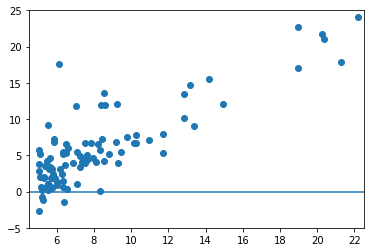

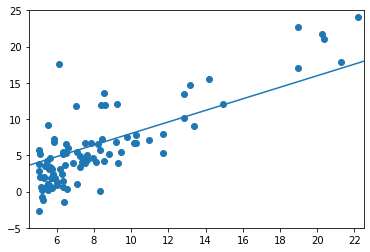

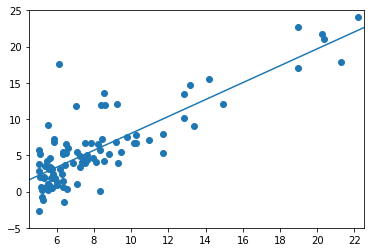

In [109]:
visualize(theta)
visualize(poorlytuned_theta)
visualize(finetuned_theta)

## Fonction de coût

Maintenant voyons comment resserrer notre analyse de l'algorithme et calculons le coût (ou la perte, ou l'erreur) à chaque itération.

### Définissez la fonction de coût de votre modèle

In [110]:
def cost(X, y, theta):
    loss = predict(X, theta) - y
    cost = (1 / (2 * X.size)) * np.dot(loss, loss.T)
    return (cost)

### Testez-la avec theta = [0,0]   Vous devriez obtenir environ 32.07

In [111]:
cost(X, y, [0.0,0.0])

32.07273387745567

### Maintenant avec theta = [-1,2]. Vous devriez obtenir environ 54.24

In [112]:
cost(X, y, [-1,2])

54.24245508201236

### Copiez le code de votre fonction _fit_ et ajoutez-y un appel à la fonction _cost_, à chaque itération. Vous stockerez vos résultats dans une liste nommée J_history, que vous retournerez avec *theta* à la fin de la fonction

Et oui, en Python, une fonction peut retourner plus qu'une variable!!

In [113]:
def fit_with_cost(X, y, theta, alpha, num_iters):
   # À compléter
    m = X.shape[0]
    J_history = []
    # Boucler sur le nombre d'itérations
    for itr in range(num_iters):
        loss = predict(X, theta) - y
        tmp_theta0 = theta[0] - (alpha / m) * sum(loss)
        tmp_theta1 = theta[1] - (alpha / m) * sum(loss * X.T)
        theta = [tmp_theta0, tmp_theta1]
        J_history.append(cost(X, y, theta))
        # Effectuer une itération de descente du gradient (i.e. on update theta une fois)
    return (theta, J_history)

### Appelez la fonction en récupérant les valeurs de theta et J_history

In [114]:
# D'abord on réinitialise theta à zéro
theta = np.zeros(2)

In [115]:
# Lancez l'entraînement avec votre nouvelle fonction
theta, J_history = fit_with_cost(X, y, theta, 0.01, 10000)

### On visualise maintenant l'évolution du coût en fonction du nombre d'itérations

Vous pouvez voir si en modifiant les valeurs d'alpha et de num_iters, le graphique change d'allure

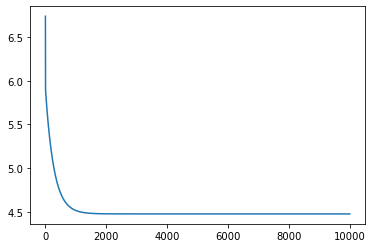

In [116]:
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)

# Régression linéaire à plusieurs variables - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

Le jeu de données donne la valeur de plusieurs maisons, ainsi que leur taille (pieds carrés) et le nombre de chambres à coucher

### Chargez les données du fichier ex1data1.csv

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

In [118]:
data = pd.read_csv("../assets/datasets/ex2data1.csv")

### Visualisez les données (valeurs réelles)

Maintenant, nous avons deux 'features'. Voyez si elles ont le même ordre de grandeur

In [119]:
data

,size,nb_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


## Définissez quelques variables utiles

### Définissez X et y

X est maintenant une matrice de dimensions m x 2

In [120]:
X = data.values[:,:2]  #convert dataframe to numpy array
y = np.array(data.price)

### Initialisez theta (combien de dimensions?)

In [121]:
theta = np.zeros(3)

### Vérifiez les dimensions de theta et de X. Sont-elles compatibles pour implémenter la fonction d'hypothèse sous forme vectorisée?

In [122]:
theta.shape, X.shape

((3,), (47, 2))

### Modifiez X en conséquence

In [123]:
X = np.c_[np.ones(X.shape[0]), X]

## Écrivez une fonction pour centrer et réduire les features

In [124]:
def featureNormalize(X):
    mean = X.mean(axis=0)
    stdev = X.std(axis=0)
    X = (X - mean)/stdev
    return X, mean, stdev

In [125]:
X[:,1:], mean, stdev = featureNormalize(X[:,1:])

### Maintenant nous allons devoir adapter nos fonctions _predict_, _fit_, et _cost_ à une situation à plusieurs variables

In [126]:
def predict(X, theta):
    return(np.dot(X, theta))

In [127]:
np.dot((predict(X, theta) - y), X)

array([-15999395.00, -4970914.27, -2571314.62])

In [128]:
def cost(X, y, theta):
    return ((1/(2 * X.shape[0])) * (np.sum((predict(X, theta) - y)**2)))

In [129]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    m = X.shape[0]
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha/m) * np.dot((predict(X, theta) - y), X)
        J_history.append(cost(X, y, theta))
    return theta, J_history

## Lancez l'entrainement du modèle

Vous êtes libres de choisir alpha et num_iters cette fois!

In [130]:
theta = np.zeros(3)
theta, J_history = fit_with_cost(X, y, theta, 0.01, 1500)

## Visualisez l'évolution du coût (graphe de convergence)

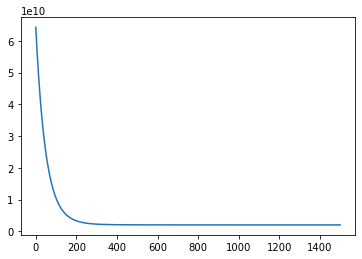

In [131]:
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)

## Testez votre modèle

Que vaut une maison de 1650 pieds carrés et de 3 chambres à coucher? (Si la valeur est aberrante, vous avez peut-être oublié une étape...)

In [132]:
X_test = (np.array([1650,3]) - mean) / stdev
X_test = np.hstack([1, X_test])
predict(X_test,theta)

293098.4666757651

### Réécrivez votre fonction fit pour qu'elle prenne en compte un parametre de regularisation (L1, L2 pour Lasso ou Ridge) et adapte la mise  a jour de theta an fonction de la regularization précisée

In [133]:
def get_regularization(theta, lbda, size, regularization):
    if regularization == "L1":
        reg = (lbda / size) * np.absolute(theta)
    elif regularization == "L2":
        reg = (lbda / size) * np.square(theta)
    reg[0] = theta[0] #the regularization is not applied on theta_0
    return (reg)

def fit_with_regularization(X, y, theta, alpha, num_iters, regularization="", lbda=0.1):
    m = X.shape[0]
    J_history = []
    
    for i in range(num_iters):        
        reg = get_regularization(theta, lbda, m, regularization)
        theta = theta - (alpha/m) * (np.dot((predict(X, theta) - y), X) + reg)
        J_history.append(cost(X, y, theta))  
    return theta, J_history

In [134]:
theta = np.zeros(3)
theta, J_history = fit_with_regularization(X, y, theta, 0.01, 1500, regularization="L2", lbda=0.01)
print(theta)
X_test = (np.array([1650,3]) - mean) / stdev
X_test = np.hstack([1, X_test])
print(predict(X_test,theta))

[333320.66 73958.70 12578.36]
297487.9533657083


In [135]:
X_test = (np.array([1650,3]) - mean) / stdev
X_test = np.hstack([1, X_test])
predict(X_test,theta)

297487.9533657083

### La fonction fit au complet. Ajoutez un dernier parametre qui précise le gradient employé (stochastic, mini_batch(avec le batch_size), batch). Pour la descente de gradient stochastic et minibatch on met a jour le learning rate avec la formule du learning rate decay

In [136]:
import random

def get_batch_size(gradient_descent, batch_size, size):
    batch_s = size
    if gradient_descent == "batch":
        decay_rate = 0.0
    elif gradient_descent == "mini_batch":
        batch_s = batch_size
    elif gradient_descent == "stochastic":
        batch_s = 1
    return (batch_s)
    
def get_regularization(theta, lbda, size, regularization):
    if regularization == "L1":
        reg = (lbda / size) * np.absolute(theta)
    elif regularization == "L2":
        reg = (lbda / size) * np.square(theta)
    reg[0] = theta[0]
    return (reg)

def learning_rate_decay(alpha_0, epochs, decay_rate):
    return((1 / (1 + decay_rate * epochs)) * alpha_0)


def batch_generator(X, y, batch_size):
    np.random.shuffle(X)
    size = X.shape[0]
    b_size = 0
    batches_X = []
    batches_y = []
    while (b_size + batch_size) < size:
        batches_X.append(X[b_size:(b_size + batch_size)])
        batches_y.append(y[b_size:(b_size + batch_size)])
        b_size += batch_size
    batches_X.append(X[b_size:size])
    batches_y.append(y[b_size:size])
    nb_batches = size // batch_size
    while True:
        rand_nb = random.randint(0,nb_batches-1)
        yield batches_X[rand_nb], batches_y[rand_nb]


def complete_fit(X,
                 y,
                 theta, 
                 alpha, 
                 num_iters, 
                 regularization="L1",
                 lbda=0.01,
                 gradient_descent="batch",
                 batch_size=4,
                 decay_rate=0.0):
    
    m = X.shape[0]
    J_history = []
    alpha_0 = alpha
    
    decay_rate = 0.0 if gradient_descent == "batch" else decay_rate
    batch_size = get_batch_size(gradient_descent, batch_size, m)     
    b_gen = batch_generator(X, y, batch_size)
    
    for epoch in range(num_iters):
        X_tmp, y_tmp = next(b_gen)
        reg = get_regularization(theta, lbda, batch_size, regularization)
        theta = theta - (alpha/m) * (np.dot((predict(X_tmp, theta) - y_tmp), X_tmp) + reg)
        alpha = learning_rate_decay(alpha_0, epoch, decay_rate)
        J_history.append(cost(X_tmp, y_tmp, theta))  
    return theta, J_history

[7762.69 101.95 -1039.35]
[7762.69 101.95 -1039.35]


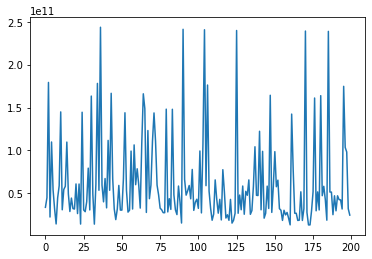

In [137]:
theta = np.zeros(3)
theta, J_history = complete_fit(X, y, theta, 0.01, 200,regularization="L1",
                                lbda=0.01, gradient_descent="stochastic", batch_size=16,
                                decay_rate=0.01)
print(theta)
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)
print(theta)

[108198.78 -6688.60 -5811.78]


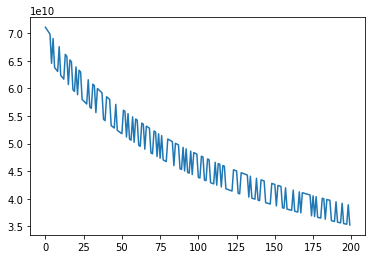

In [138]:
theta = np.zeros(3)
theta, J_history = complete_fit(X, y, theta, 0.01, 200,regularization="L1",
                                lbda=0.01, gradient_descent="mini_batch", batch_size=16,
                                decay_rate=0.01)
print(theta)
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)

[290541.60 -4258.10 10367.70]


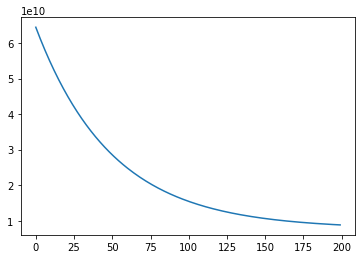

In [139]:
theta = np.zeros(3)
theta, J_history = complete_fit(X, y, theta, 0.01, 200,regularization="L1",
                                lbda=0.01, gradient_descent="batch", batch_size=16,
                                decay_rate=0.01)
print(theta)
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)